# 서울시 구별 CCTV 현황 분석

## 파이썬에서 텍스트 파일과 엑셀 파일 읽기 - pandas

In [167]:
import pandas as pd

In [168]:
CCTV_Seoul = pd.read_csv('../data/01. CCTV_in_Seoul.csv', encoding = 'utf-8') # encoding = 'utf-8'을 통해 한글로 인코딩
CCTV_Seoul.head() # head() 명령어는 pandas 데이터의 첫 5행만 보여달라는 뜻

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [169]:
print(CCTV_Seoul.columns)
print(CCTV_Seoul.columns[0])

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')
기관명


pandas데이터.columns : 해당 컬럼을 보여주며 인덱스로 접근할 수 있다.

In [170]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace = True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


pandas데이터.rename()으로 데이터의 이름을 바꿀 수 있다. inplace = True 명령어가 있어야만 실제 데이터 값이 갱신된다.

In [171]:
pop_Seoul = pd.read_excel('../data/01. population_in_Seoul.xls', encoding='utf-8')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


[0]번째 및 [1]번째 칼럼까지가 열의 제목이므로 다른 옵션들을 추가 지정해주어야 한다.

In [172]:
pop_Seoul = pd.read_excel('../data/01. population_in_Seoul.xls', 
                          header = 2, # 열의 제목을 제시함, header 보다 위에 있는 열은 지움
                          usecols = 'B,D,G,J,N', # Excel에서 원하는 컬럼만을 뽑아줌
                          encoding='utf-8')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [173]:
pop_Seoul.rename(columns = {pop_Seoul.columns[0] : '구별',
                            pop_Seoul.columns[1] : '인구수',
                            pop_Seoul.columns[2] : '한국인',
                            pop_Seoul.columns[3] : '외국인',
                            pop_Seoul.columns[4] : '고령자'}, inplace = True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


## cf) pandas 기초 익히기 

In [174]:
import pandas as pd
import numpy as np

In [175]:
# pandas의 데이터 유형 중 기초가 되는 Series는 list 데이터로 만들 수 있다.

s = pd.Series([1,3,5,np.nan,6,8]) 
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [176]:
# pandas의 날짜형 데이터 date_range
# 기본 날짜를 지정하고 periods 옵션으로 '며칠 간'을 지정한다.

dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [177]:
# index에 dates 리스트를, columns에 컬럼 이름을 지정한 리스트를 넣어서 DataFrame을 만들 수 있다.

df = pd.DataFrame(np.random.randn(6,4), index = dates, columns = ['A','B','C','D'])
df.head(3) # head 함수에 숫자를 넣으면 해당 숫자만큼의 row를 출력한다.

,A,B,C,D
2013-01-01,-0.785829,0.234740,-1.196329,0.057939
2013-01-02,-1.428895,-1.230672,-0.065485,0.690936
2013-01-03,0.921952,0.105684,0.823580,0.242374


In [178]:
print(df.index) # DataFrame의 인덱스
print()
print(df.columns) # DataFrame의 컬럼
print()
print(df.values) # DataFrame의 값

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

Index(['A', 'B', 'C', 'D'], dtype='object')

[[-0.78582874  0.23473998 -1.1963292   0.05793867]
 [-1.42889543 -1.23067229 -0.0654853   0.69093637]
 [ 0.92195207  0.10568395  0.82357955  0.24237369]
 [ 0.86715017  0.11271229 -0.18882702 -0.57604256]
 [-0.0573613   1.13484955 -0.36147892 -0.53842405]
 [-0.12703835  0.47402451 -0.30589032 -1.12545144]]


In [179]:
df.info() # DataFrame의 정보

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
A    6 non-null float64
B    6 non-null float64
C    6 non-null float64
D    6 non-null float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [180]:
df.describe() # DataFrame의 통개적 개요 (개수, 평균 등)

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.101670,0.138556,-0.215739,-0.208112
std,0.918545,0.773424,0.647211,0.658483
min,-1.428895,-1.230672,-1.196329,-1.125451
25%,-0.621131,0.107441,-0.347582,-0.566638
50%,-0.092200,0.173726,-0.247359,-0.240243
75%,0.636022,0.414203,-0.096321,0.196265
max,0.921952,1.134850,0.823580,0.690936


In [181]:
# 특정 컬럼을 기준으로 정렬

df.sort_values(by='B', ascending=False)

,A,B,C,D
2013-01-05,-0.057361,1.134850,-0.361479,-0.538424
2013-01-06,-0.127038,0.474025,-0.305890,-1.125451
2013-01-01,-0.785829,0.234740,-1.196329,0.057939
2013-01-04,0.867150,0.112712,-0.188827,-0.576043
2013-01-03,0.921952,0.105684,0.823580,0.242374
2013-01-02,-1.428895,-1.230672,-0.065485,0.690936


In [182]:
# 특정 컬럼만 검색

df['A']

2013-01-01   -0.785829
2013-01-02   -1.428895
2013-01-03    0.921952
2013-01-04    0.867150
2013-01-05   -0.057361
2013-01-06   -0.127038
Freq: D, Name: A, dtype: float64

In [183]:
# 특정 로우만 검색

df[0:3]

,A,B,C,D
2013-01-01,-0.785829,0.234740,-1.196329,0.057939
2013-01-02,-1.428895,-1.230672,-0.065485,0.690936
2013-01-03,0.921952,0.105684,0.823580,0.242374


In [184]:
# 특정 날짜만 검색

df['20130102':'20130104']

,A,B,C,D
2013-01-02,-1.428895,-1.230672,-0.065485,0.690936
2013-01-03,0.921952,0.105684,0.823580,0.242374
2013-01-04,0.867150,0.112712,-0.188827,-0.576043


In [185]:
# DataFrame에서 특정 로우만 검색하고싶을 경우

df.loc[dates[0]]

A   -0.785829
B    0.234740
C   -1.196329
D    0.057939
Name: 2013-01-01 00:00:00, dtype: float64

In [186]:
# DataFrame에서 특정 컬럼의 모든 행을 보고싶을 경우

df.loc[:,['A','B']]

,A,B
2013-01-01,-0.785829,0.234740
2013-01-02,-1.428895,-1.230672
2013-01-03,0.921952,0.105684
2013-01-04,0.867150,0.112712
2013-01-05,-0.057361,1.134850
2013-01-06,-0.127038,0.474025


In [187]:
# iloc을 사용하면 행이나 열의 번호를 이용하여 데이터에 바로 접근할 수 있다.

df.iloc[3] # index [3] 행을 보여줌

A    0.867150
B    0.112712
C   -0.188827
D   -0.576043
Name: 2013-01-04 00:00:00, dtype: float64

In [188]:
# iloc을 사용하면 행이나 열의 번호를 이용하여 데이터에 바로 접근할 수 있다.


df.iloc[3:5, 0:2] # index [3:5] 행, columns [0:2] 컬럼

,A,B
2013-01-04,0.867150,0.112712
2013-01-05,-0.057361,1.134850


In [189]:
# iloc을 사용하면 행이나 열의 번호를 이용하여 데이터에 바로 접근할 수 있다.


df.iloc[[1,2,4], [0,3]] # index [1][2][4] 행, columns [0][3] 컬럼

,A,D
2013-01-02,-1.428895,0.690936
2013-01-03,0.921952,0.242374
2013-01-05,-0.057361,-0.538424


In [190]:
# iloc을 사용하면 행이나 열의 번호를 이용하여 데이터에 바로 접근할 수 있다.


df.iloc[1:3,:] # index [1:3] 행, 모든 컬럼

,A,B,C,D
2013-01-02,-1.428895,-1.230672,-0.065485,0.690936
2013-01-03,0.921952,0.105684,0.823580,0.242374


In [191]:
# 특정 조건을 만족하는 행을 뽑는 경우

df[df.A>0] # 컬럼 A에서 0보다 큰 행만 얻는 경우

,A,B,C,D
2013-01-03,0.921952,0.105684,0.823580,0.242374
2013-01-04,0.867150,0.112712,-0.188827,-0.576043


In [192]:
# 특정 조건을 만족하는 행을 뽑는 경우

df[df>0] # DataFrame 내의 모든 조건을 뽑되, 만족하지 않는 것은 NaN 처리

,A,B,C,D
2013-01-01,NaN,0.234740,NaN,0.057939
2013-01-02,NaN,NaN,NaN,0.690936
2013-01-03,0.921952,0.105684,0.82358,0.242374
2013-01-04,0.867150,0.112712,NaN,NaN
2013-01-05,NaN,1.134850,NaN,NaN
2013-01-06,NaN,0.474025,NaN,NaN


DataFrame을 복사할 때는 단순히 = 기호를 이용해서 복사하면 실제 데이터의 내용이 복사되는 것이 아니라 데이터 위치만 복사되기 때문에 원본 데이터는 하나만 있게 된다. 따라서 데이터의 내용까지 복사하라는 명령으로 copy() 메소드를 써야한다.

In [193]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,-0.785829,0.234740,-1.196329,0.057939,one
2013-01-02,-1.428895,-1.230672,-0.065485,0.690936,one
2013-01-03,0.921952,0.105684,0.823580,0.242374,two
2013-01-04,0.867150,0.112712,-0.188827,-0.576043,three
2013-01-05,-0.057361,1.134850,-0.361479,-0.538424,four
2013-01-06,-0.127038,0.474025,-0.305890,-1.125451,three


특정 컬럼에 특정 값이 있는지 조건을 걸고싶을 때는 isin 명령어를 쓴다. 그 결과로 True/False가 반환되면 이것을 이용하여 조건에 맞는 데이터를 선택할 수 있다.

In [194]:
df2['E'].isin(['two','four'])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

In [195]:
# True/False 를 이용하여 원하는 데이터를 선택하는 경우

df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.921952,0.105684,0.823580,0.242374,two
2013-01-05,-0.057361,1.134850,-0.361479,-0.538424,four


df 변수에서 좀 더 통계 느낌의 데이터를 볼 때는 특정 함수를 적용시키는 것이 좋다. 이때 사용하는 것이 apply 명령이다. 누적합을 알고싶을 때는 numpy의 cumsum을 이용한다.

In [196]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,-0.785829,0.234740,-1.196329,0.057939
2013-01-02,-2.214724,-0.995932,-1.261815,0.748875
2013-01-03,-1.292772,-0.890248,-0.438235,0.991249
2013-01-04,-0.425622,-0.777536,-0.627062,0.415206
2013-01-05,-0.482983,0.357313,-0.988541,-0.123218
2013-01-06,-0.610022,0.831338,-1.294431,-1.248669


In [197]:
# 최대값과 최소값의 차이를 을고싶을 경우 one-line 함수인 lambda를 이용할 수 있다.

df.apply(lambda x: x.max() - x.min())

A    2.350848
B    2.365522
C    2.019909
D    1.816388
dtype: float64

## pandas를 이용한 CCTV와 인구 현황 데이터 파악

In [198]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [199]:
# 구별 CCTV 데이터에서 CCTV 전체 개수인 '소계'로 정렬

CCTV_Seoul.sort_values(by='소계', ascending = False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [200]:
# 2014년부터 2016년까지 최근 3년간 CCTV 수를 더하고 2013년 이전 CCTV 수로 나누어서 최근 3년간 CCTV 증가율을 계산

CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2014년'])\
                        / CCTV_Seoul['2013년도 이전'] * 100
CCTV_Seoul.sort_values(by='최근증가율', ascending = False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


CCTV가 최근 3년간 가장 많이 증가한 구는 '종로구', '도봉구', '마포구', '노원구', '강동구'임을 알 수 있다.

In [201]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [202]:
# 필요 없는 행을 삭제

pop_Seoul.drop([0], inplace = True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [203]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan], dtype=object)

pop_Seoul 데이터의 '구별' 컬럼의 unique를 조사해보니 NaN이 보인다. NaN이 어디에 있는지 확인 후 해당 행을 삭제한다.

In [204]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [205]:
pop_Seoul.drop([26], inplace = True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [206]:
# 각 구별 전체 인구를 이용해서 구별 '외국인비율'과 '고령자비율' 계산

pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [207]:
# 인구수 순으로 정렬
pop_Seoul.sort_values(by='인구수', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [208]:
# 외국인 순으로 정렬
pop_Seoul.sort_values(by='외국인', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [209]:
# 외국인비율 순으로 정렬
pop_Seoul.sort_values(by='외국인비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


## pandas 고급 기능 - 두 DataFrame 병합하기

In [210]:
df1 = pd.DataFrame({'A' : ['A0','A1','A2','A3'],
                   'B' : ['B0','B1','B2','B3'],
                   'C' : ['C0','C1','C2','C3'],
                   'D' : ['D0','D1','D2','D3']}, index = [0,1,2,3])
df2 = pd.DataFrame({'A' : ['A4','A5','A6','A7'],
                   'B' : ['B4','B5','B6','B7'],
                   'C' : ['C4','C5','C6','C7'],
                   'D' : ['D4','D5','D6','D7']}, index = [4,5,6,7])
df3 = pd.DataFrame({'A' : ['A8','A9','A10','A11'],
                   'B' : ['B8','B9','B10','B11'],
                   'C' : ['C8','C9','C10','C11'],
                   'D' : ['D8','D9','D10','D11']}, index = [8,9,10,11])

In [211]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [212]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [213]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [214]:
# 이렇게 만든 데이터를 단순히 열 방향으로 합치는 명령어 : concat 

result = pd.concat([df1,df2,df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [215]:
# concat 명렁어에 옵션 주기 

result = pd.concat([df1,df2,df3], keys=['x','y','z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [216]:
result.index

MultiIndex(levels=[['x', 'y', 'z'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]])

In [217]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [218]:
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

위와 같이 keys 옵션을 주면 지정된 구분은 다중 index가 되어서 level을 형성한다.

In [219]:
df4 = pd.DataFrame({'B':['B2','B3','B6','B7'],
                   'D':['D2','D3','D6','D7'],
                   'F':['F2','F3','F6','F7']},
                  index = [2,3,6,7])
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [220]:
result = pd.concat([df1,df4], axis=1)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


위 예제에서 알 수 있듯이 concat 명령은 index를 기준으로 데이터를 합친다. 그래서 값을 가질 수 없는 곳에는 NaN이 저장된다. 이때 공통된 index로 합치고 공통되지 않은 index의 데이터는 버리도록 하는 옵션이 join='inner' 옵션이다.

In [221]:
result = pd.concat([df1,df4], axis=1, join = 'inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


또 join_axes=[df1.index] 옵션으로 df1dㅢ 인덱스에 맞추도록 할 수도 있다.

In [222]:
result = pd.concat([df1,df4], axis=1, join_axes=[df1.index])
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


concat 명령을 사용하는데 열 방향으로 합치면서 ignore_index = True라고 옵션을 잡으면 두 데이터의 index를 무시하고 합친 후 다시 index를 부여한다.

In [223]:
result = pd.concat([df1,df4], ignore_index = True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [224]:
left = pd.DataFrame({'Key':['K0','K4','K2','K3'],
                    'A':['A0','A1','A2','A3'],
                    'B':['B0','B1','B2','B3']})
right = pd.DataFrame({'Key':['K0','K1','K2','K3'],
                    'c':['C0','C1','C2','C3'],
                    'd':['D0','D1','D2','D3']})

In [225]:
left

,A,B,Key
0,A0,B0,K0
1,A1,B1,K4
2,A2,B2,K2
3,A3,B3,K3


In [226]:
right

,Key,c,d
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


key를 기준으로 병합하기 위해서 merge 메소드를 쓰며, on = 'key' 조건을 붙인다.

In [227]:
pd.merge(left,right,on='Key')

,A,B,Key,c,d
0,A0,B0,K0,C0,D0
1,A2,B2,K2,C2,D2
2,A3,B3,K3,C3,D3


In [228]:
pd.merge(left,right,how='outer',on='Key')

,A,B,Key,c,d
0,A0,B0,K0,C0,D0
1,A1,B1,K4,NaN,NaN
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3
4,NaN,NaN,K1,C1,D1


In [229]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [230]:
# 불필요한 컬럼 삭제 : del (cf. 행 방향으로 삭제하는 것은 drop)

del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']

data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [231]:
# index를 구 이름으로 설정 (나중에 그래프를 그릴 때 유리함)

data_result.set_index('구별', inplace = True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


고령자비율, 외국인비율, 인구수 중에서 무슨 데이터와 CCTV를 비교할지 정해보려 한다. 그렇게 하는 가장 단순한 작업이 상관계수를 조사하는 것이다. 상관계수의 절댓값이 클수록 두 데이터는 관계가 있다고 볼 수 있다. 위키백과의 상관분석 문서에는 상관계수의 절댓값이 0.1 이하면 거의 무시, 0.3 이하면 약한 상관관계, 0.7 이하면 뚜렷한 상관관계라고 한다. 상관계수를 계산하는 방법은 numpy에 있는 corrcoef 명령어다. 이 명령의 결과는 행렬로 나타나고, 주 대각선을 기준으로 대칭인 행렬이며, 대각선 빼고 다른 값을 읽으면 된다.

In [232]:
# 고령자비율과 CCTV 상관관계
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [233]:
# 외국인비율과 CCTV 상관관계
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [234]:
# 인구수와 CCTV 상관관계
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[ 1.        ,  0.30634228],
       [ 0.30634228,  1.        ]])

조사 결과, CCTV 개수와 고령자비율은 약한 음의 상관관계이고, 외국인비율은 큰 의미가 없다고 할 수 있다. 그런데 인구수와는 상관관계가 0.3이어서 약한 상관관계가 있다고 볼 수 있다. 

그렇다면 CCTV와 인구수의 관계를 조금 더 살펴보자.

In [235]:
data_result.sort_values(by='소계', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [236]:
data_result.sort_values(by='인구수', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


matplotlib을 활용하여 위의 두 데이터인 소계(CCTV개수)와 인구수의 상관관계를 그래프로 나타내보자 !

## 파이썬의 대표 시각화 도구 - matplotlib

In [237]:
import matplotlib.pyplot as plt
%matplotlib inline
# 주피터 노트북을 사용하는 경우에는 %matplotlib inline 이라는 매직 명령어로 노트북 내부에 그림을 표시하도록 지정해야 한다.

matplotlib는 많은 내용이 있는데, 그중에 그래프를 그리는 모듈은 matplotlib.pyplot이다.

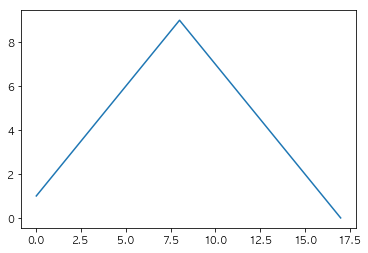

In [238]:
plt.figure
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0])
plt.show()

In [239]:
# numpy를 이용해서 sin을 만들고 그려보기

t = np.arange(0,12,0.01) # 0부터 12까지 0.01의 간격으로 데이터를 만들기
y = np.sin(t) 

0부터 12까지 0.01 간격으로 데이터를 만들고, 그 리스트를 np.sin에 입력하면 sin값이 나타난다. 이 부분을 유심히 보자. 지금 t라는 시간 혹은 그래프상에서 x축을 의미하는 데이터를 0부터 12까지 만들고 그냥 사인 함수(np.sin)에 입력해서 그 출력을 y로 저장했다. 단 두줄이다. t는 값을 하나만 가진 변수가 아닌, 약 1200개 정도의 값을 가진 일종의 배열이다. 그것을 반복문 없이 그냥 한 줄로 처리한 것이다. 대단하다.

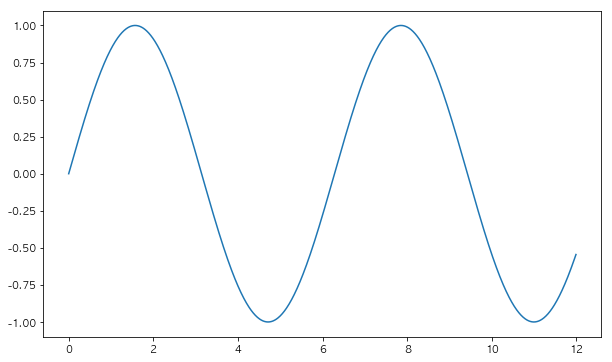

In [240]:
plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.show()

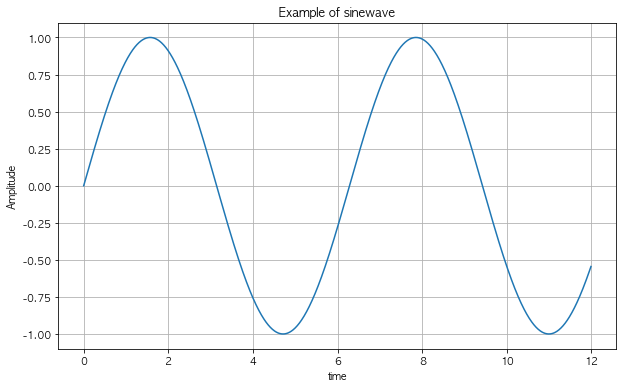

In [241]:
plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

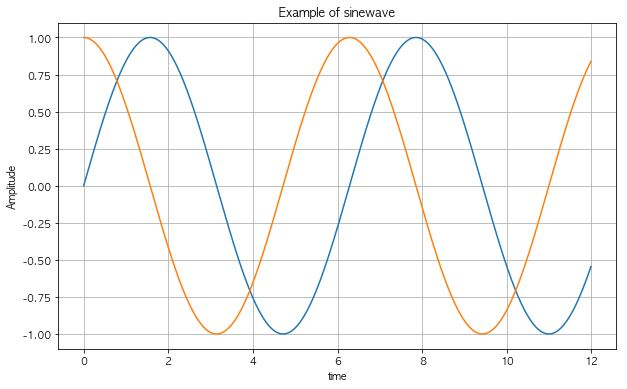

In [242]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

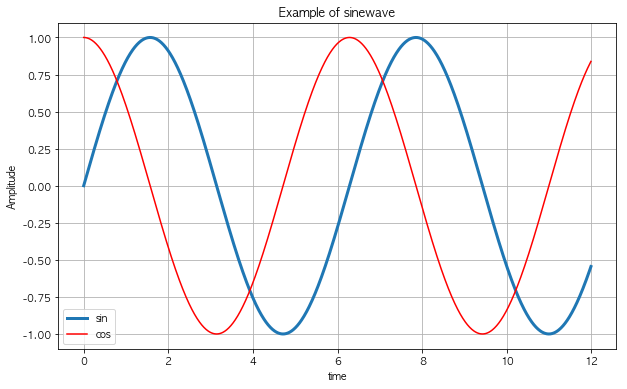

In [243]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin') # 범례 등 각종 옵션을 넣어줌
plt.plot(t, np.cos(t), 'r' , label='cos') # 범례 등 각종 옵션을 넣어줌 
plt.grid()
plt.legend() # 범례를 넣어줌
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

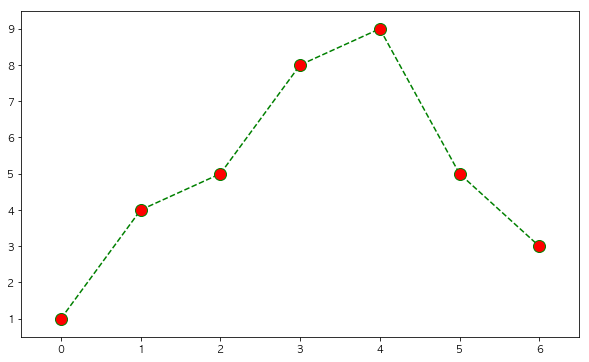

In [244]:
# 선을 그리는 plot 명령

t = [0,1,2,3,4,5,6]
y = [1,4,5,8,9,5,3]
plt.figure(figsize=(10,6)) 
plt.plot(t,y,color='green', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=12) # plt.plot의 첫번째 인자는 x축의 tick을 명시해준다 
plt.xlim([-0.5, 6.5]) # 그림의 범위 경계선 지정
plt.ylim([0.5, 9.5]) # 그림의 범위 경계선 지정
plt.show()

In [245]:
# scatter 명령

t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

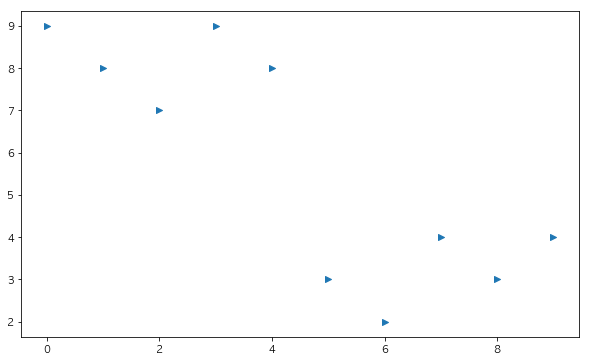

In [246]:
plt.figure(figsize=(10,6))
plt.scatter(t,y, marker='>') # plt.scatter의 첫번째 인자는 x축의 tick을 명시해준다
plt.show()

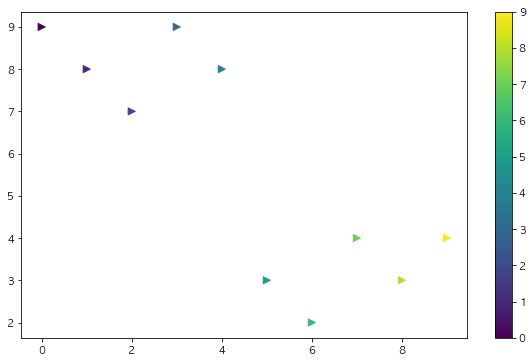

In [247]:
colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t,y, s=50, c=colormap, marker='>') # plt.scatter의 첫번째 인자는 x축의 tick을 명시해준다
plt.colorbar()
plt.show()

x축 값인 t에 따라 색상을 바꾸는 color map을 지정해보았다. 이때 s 옵션은 마커의 크기이다.

numpy의 랜덤변수 함수를 이용해서 데이터 세 개를 만들어보겠다. 이때 loc 옵션으로 평균값과 scale 옵션으로 표준편차를 지정할 수 있다.

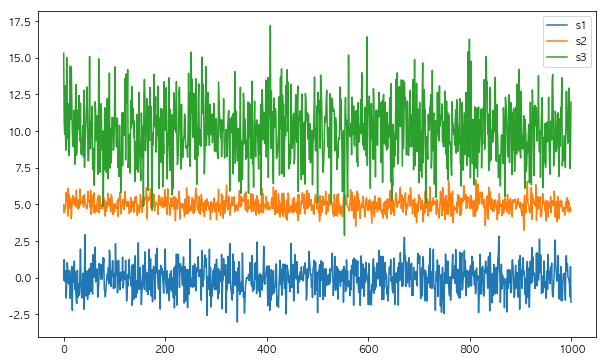

In [248]:
s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)

plt.figure(figsize=(10,6))
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

이것을 boxplot으로 표현할 수 있다. boxplot의 정의는 조금 복잡하니 다음에 다시 학습하자.

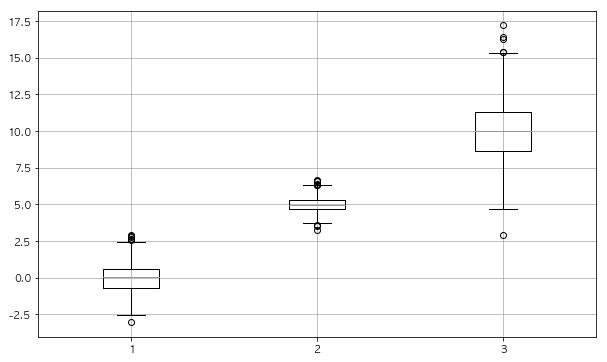

In [249]:
plt.figure(figsize=(10,6))
plt.boxplot((s1,s2,s3))
plt.grid()
plt.show()

## CCTV 현황 그래프로 분석하기

matplotlib이 기본으로 가진 폰트는 한글을 지원하지 않기 때문에 matplotlib의 폰트를 변경할 필요가 있다. 

In [250]:
# matplotlib 한글 문제 처리

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin': # Mac OS
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows' : # Windows
    path = "c:/Windows/Fonts/malgun.ttf"
else:
    print('Unknown system.. Sorry !')

In [251]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


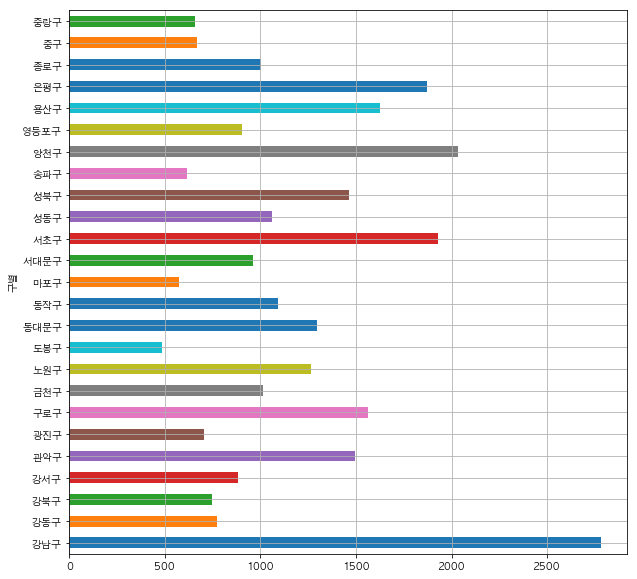

In [254]:
# CCTV 개수에 따른 막대그래프 (정렬 전)

data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

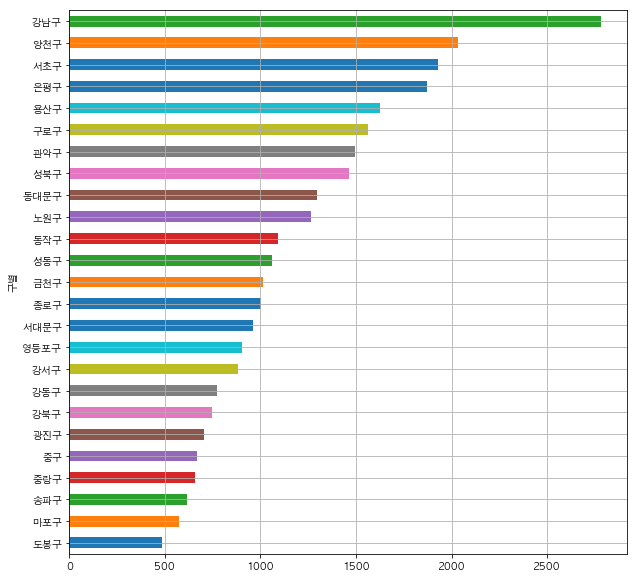

In [255]:
# CCTV 개수에 따른 막대그래프 (정렬 후)

data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

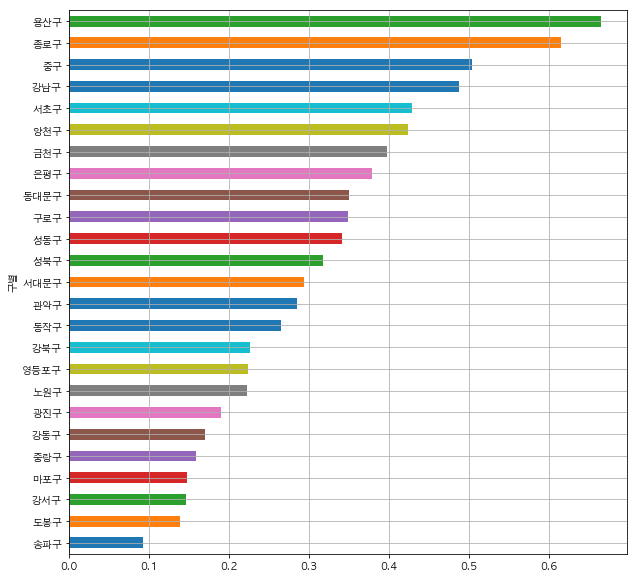

In [256]:
# 인구 대비 CCTV 비율을 계산해서 정렬하여 그래프를 그리기

data_result['CCTV비율'] = data_result['소계']/data_result['인구수']*100 # 'CCTV비율'이라는 새로운 컬럼 생성
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

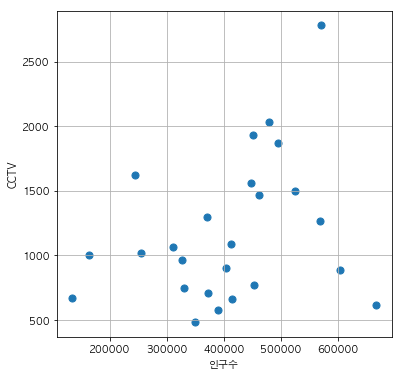

In [257]:
# 인구수와 CCTV개수의 산포도

plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

이제 저 데이터를 대표하는 직선을 하나 그리려고 한다. 왜냐하면 지난 절에서 CCTV와 인구수는 양의 상관관계가 있다고 봤으니말이다.

In [259]:
# polyfit : 최소자승법을 활용한 선형회귀
# plyfit 명령으로 손쉽게 직선을 만들 수 있다

fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1) 
fp1

array([  1.30916415e-03,   6.45066497e+02])

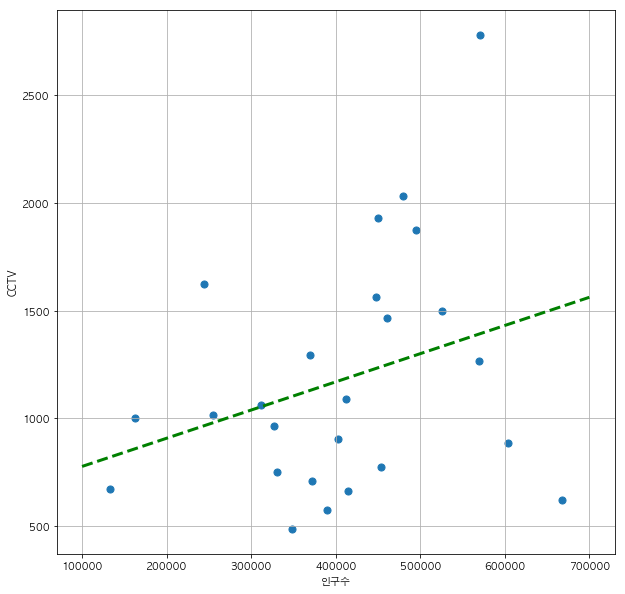

In [262]:
# 산포도와 선형회귀 그래프를 함께 도식화

f1 = np.poly1d(fp1) # 선형회귀 데이터를 y축으로 설정
fx = np.linspace(100000, 700000, 100) # x축

plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

여기서 두 가지 장치를 넣고자 한다. 하나는 직선이 이 전체 데이터의 대푯값 역할을 한다면, 즉 인구수가 300000일 때는 CCTV는 1100 정도여야 한다는 개념을 이야기하는 거라면 그 경향에서 멀리 있는 구는 이름이 같이 나타나도록 하고 싶다는 것과, 직선에서 멀어질수록 다른 색을 나타내도록 하고 싶다는 것이다.

이를 위해 오차를 계산할 수 있는 코드를 만들고 오차가 큰 순으로 데이터를 정렬해서 다시 저장해보자.

<function matplotlib.pyplot.show>

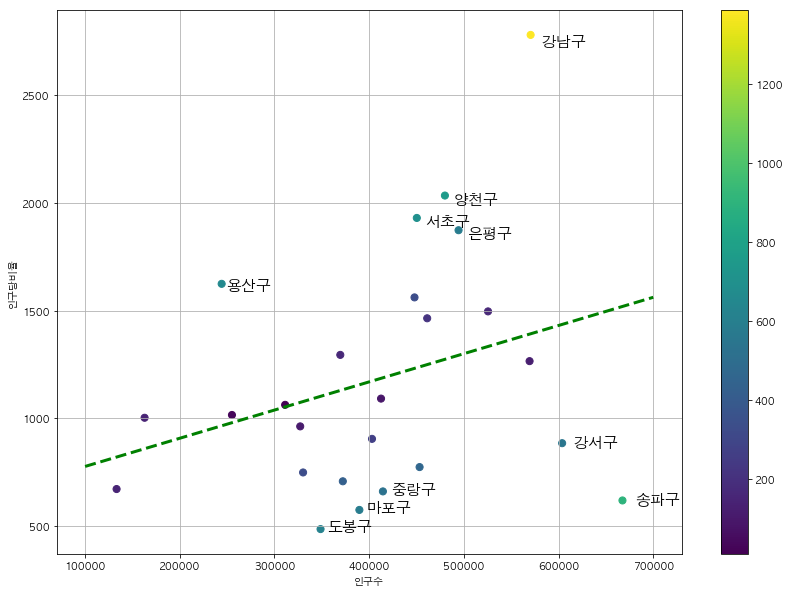

In [270]:
# 최종 그래프 그리기 (오차와 color map 포함)

fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수'])) # 오차 구하기

df_sort = data_result.sort_values(by = '오차', ascending=False)
df_sort.head()

# 텍스트와 color map을 입힌 후 그래프 그리기

plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'],
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10) : # 오차 순으로 정렬된 데이터에서 상위 10개만 텍스트를 삽입
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98,
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')

plt.colorbar()
plt.grid()
plt.show

그래프 해석 : 직선을 기준으로 위에 있는 '강남구', '양천구', '서초구', '은평구', '용산구'는 서울시 전체 지역의 일반적인 경향보다 CCTV가 많이 설치된 지역으로 볼 수 있다. 반면, 직선 아래에 있는 곳들은 CCTV가 적게 설치된 지역이다. 특히 '강남구'는 월등히 많은 CCTV가 설치됐지만, '송파구'는 인구수에 비해 너무나도 적은 수의 CCTV를 가지고 있다.